# Usage guide:

* Follow the instructions at every step
* Values that need to be changed in code are followed by a `# CHANGE ME` comment and any required context.
* To run a cell (box of code), click on it and either press the `run this cell` in the menu or press `shift+enter` on your keyboard.
* Order of execution matters. Run cells one by one from the top. If you are getting errors or weird results, check FAQ below.

## FAQ:

* I'm getting errors / weird results: Make sure you are running cells in order, good debugging step is to reset the notebook by pressing the `restart the kernel` button in the top menu.
* If you are getting `module not found` or `unknown` errors, there's probably something wrong with your setup. Please make sure your libraries are properly installed.

In [1]:
# This cell installs project dependencies.
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


This cell just imports libraries that we'll rely on.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure
import tifffile
from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
from IPython.display import display

%matplotlib widget

### Select your file
Provide the path to your file.

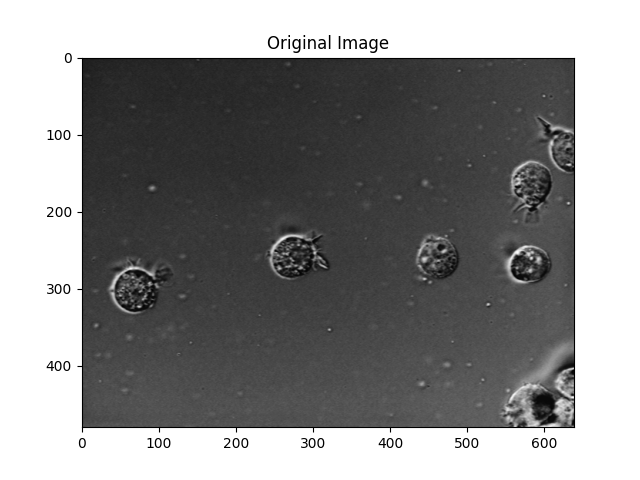

In [7]:
image_path = './images/at3_1m4_01.tif' # CHANGE ME

image = tifffile.imread(image_path)
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

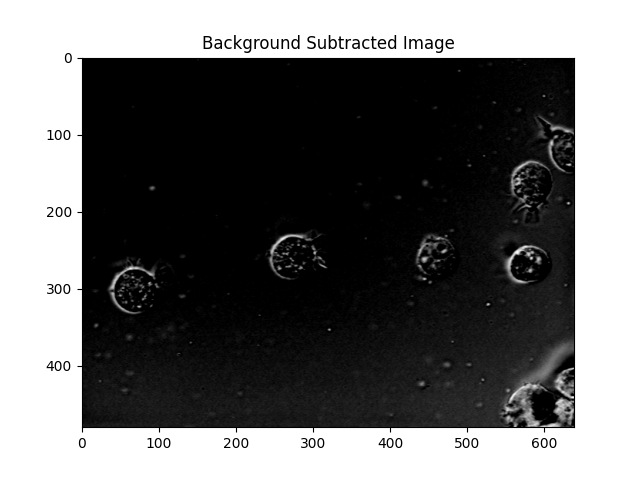

In [8]:
# Calculates the background color as the median. This isn't the same as the default in ImageJ.
# Subtracting the median works well if the background is well represented by the median pixel intensity.
median_value = np.median(image)

# Subtract the median from the image, and clip values at 0 to avoid negative intensities
image_bg_subtracted = np.clip(image - median_value, 0, None)
plt.figure()
plt.imshow(image_bg_subtracted, cmap='gray')
plt.title('Background Subtracted Image')
plt.show()

### Select Threshold value

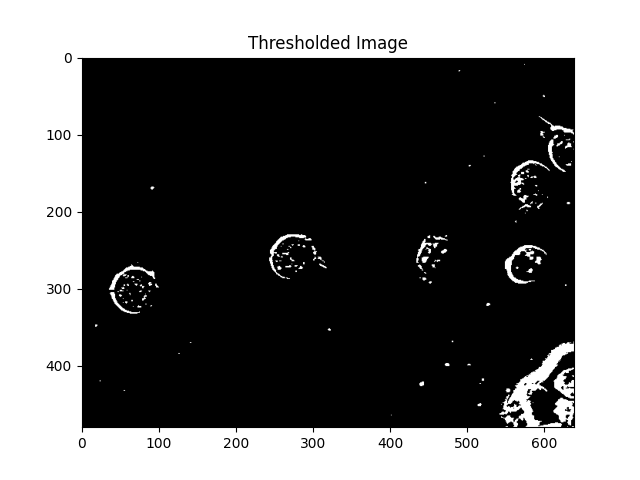

In [9]:
thresh_val = 50 # CHANGE ME - Pick a threshold value

thresholded_image = image_bg_subtracted > thresh_val
plt.figure()
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.show()

### Select area of interest

Usage:
1. Run the cell below by clicking on it and then either pressing the `run` button in the top-menu or by pressing `shift+enter`
2. By clicking on the image, you can draw a polygon to select the area of interest
    * If you need to restart drawing the polygon, just rerun the cell from step `1.`

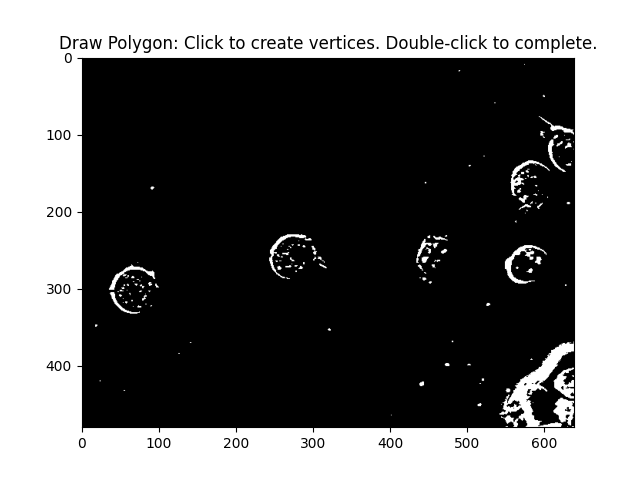

In [10]:
fig, ax = plt.subplots()
plt.imshow(thresholded_image, cmap='gray')
plt.title('Draw Polygon: Click to create vertices. Double-click to complete.')


# Define what happens when the polygon is drawn
area_of_interest = []
def onselect(verts):
    area_of_interest.clear()
    area_of_interest.extend(verts)
    print("Polygon vertices:", verts)
    

# Use the PolygonSelector widget from matplotlib
polygon_selector = PolygonSelector(ax, onselect, props=dict(color='r', linestyle='-', linewidth=2, alpha=0.5))

plt.show()

### Calculate percentage of activated pixels within area of interest

This works by calculating the number of pixels over the threshold divided by the total number of pixels in the selected area.

In [12]:
# Creates a mask
height, width = thresholded_image.shape[:2]
poly_path = Path(area_of_interest)
x, y = np.meshgrid(np.arange(width), np.arange(height))
coords = np.vstack((x.flatten(), y.flatten())).T

mask = poly_path.contains_points(coords).reshape(height, width)

# Applies the mask to your image
masked_image = np.where(mask, thresholded_image, 0)

# Counts non-zero pixels
non_zero_count = np.count_nonzero(masked_image)

# Calculates % non-zero in area of interest
total_pixels = np.count_nonzero(mask)
percentage_non_zero = (non_zero_count / total_pixels) * 100 if total_pixels > 0 else 0

print("Percentage of non-zero pixels within the polygon:")
print(f"{percentage_non_zero:.3f}%")

Percentage of non-zero pixels within the polygon:
21.085%
